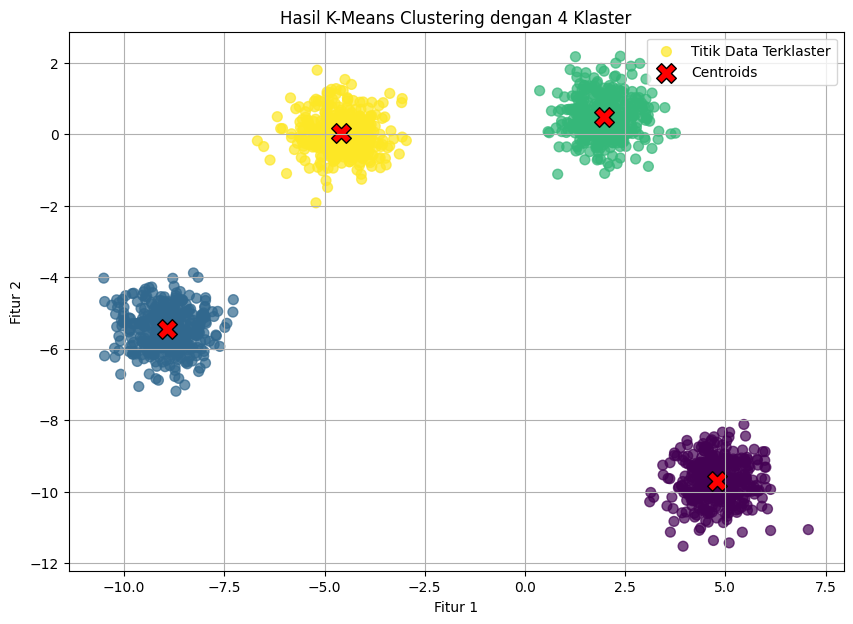

Jumlah sampel data: 1500
Jumlah klaster (K): 4

Koordinat Centroids:
  Klaster 1: [ 4.7946227  -9.71254727]
  Klaster 2: [-8.93156677 -5.45414642]
  Klaster 3: [1.97503844 0.47851092]
  Klaster 4: [-4.59818793  0.01982517]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# --- Konfigurasi K-Means ---
N_SAMPLES = 1500  # Jumlah sampel data yang akan dibuat
RANDOM_STATE = 170  # Seed untuk reproduktifitas hasil
N_CLUSTERS = 4  # Jumlah klaster (K) yang diinginkan

# --- 1. Membuat Data Contoh ---
# make_blobs adalah fungsi dari scikit-learn untuk menghasilkan data terklaster
# n_samples: jumlah total titik data
# centers: jumlah pusat klaster
# cluster_std: deviasi standar klaster (seberapa menyebar titik-titik dalam klaster)
# random_state: seed untuk generator angka acak
X, y = make_blobs(n_samples=N_SAMPLES, centers=N_CLUSTERS, cluster_std=0.60, random_state=RANDOM_STATE)

# --- 2. Menerapkan Algoritma K-Means ---
# Inisialisasi model K-Means
# n_clusters: jumlah klaster yang akan dibentuk
# init: metode inisialisasi pusat klaster ('k-means++' adalah metode yang cerdas)
# n_init: jumlah kali algoritma K-Means akan dijalankan dengan inisialisasi centroid yang berbeda.
#         Hasil terbaik dari n_init akan dipilih.
# random_state: seed untuk reproduktifitas
kmeans = KMeans(n_clusters=N_CLUSTERS, init='k-means++', n_init=10, random_state=RANDOM_STATE)

# Melatih model K-Means pada data
# fit_predict akan melatih model dan mengembalikan label klaster untuk setiap titik data
y_pred = kmeans.fit_predict(X)

# Mendapatkan koordinat pusat klaster (centroids)
centroids = kmeans.cluster_centers_

# --- 3. Memvisualisasikan Hasil ---
plt.figure(figsize=(10, 7)) # Mengatur ukuran plot

# Plot titik-titik data, diwarnai berdasarkan klaster yang ditetapkan oleh K-Means
# c=y_pred: warna titik berdasarkan label klaster prediksi
# cmap='viridis': skema warna yang digunakan
# marker='o': bentuk penanda titik data
# s=50: ukuran penanda titik data
# alpha=0.7: transparansi titik data
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', s=50, alpha=0.7, label='Titik Data Terklaster')

# Plot pusat klaster (centroids)
# c='red': warna merah untuk centroids
# marker='X': bentuk penanda 'X' untuk centroids
# s=200: ukuran penanda centroids
# edgecolor='black': garis tepi hitam untuk centroids
# label='Centroids': label untuk legenda
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, edgecolor='black', label='Centroids')

# Menambahkan judul dan label sumbu
plt.title(f'Hasil K-Means Clustering dengan {N_CLUSTERS} Klaster')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')

# Menampilkan legenda
plt.legend()

# Menambahkan grid untuk keterbacaan
plt.grid(True)

# Menampilkan plot
plt.show()

print(f"Jumlah sampel data: {N_SAMPLES}")
print(f"Jumlah klaster (K): {N_CLUSTERS}")
print("\nKoordinat Centroids:")
for i, centroid in enumerate(centroids):
    print(f"  Klaster {i+1}: {centroid}")